In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
from rasterio.plot import show

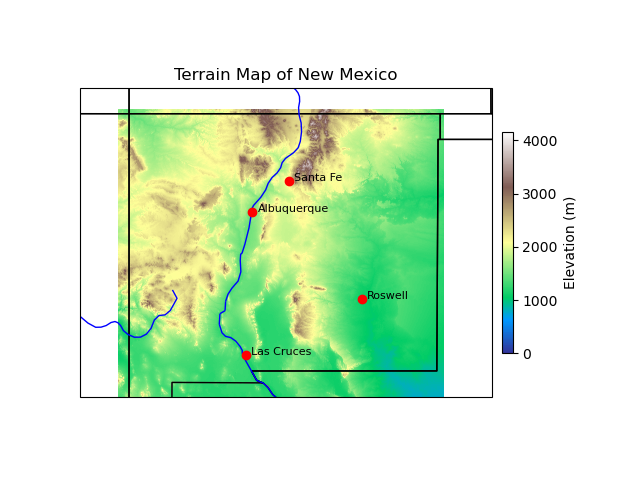

In [3]:
#%% Terrain map

# Set the area extent for New Mexico
extent = [-110, -102, 31.5, 37.5]

# Create a plot with the PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Terrain Map of New Mexico')

# Path to your DEM data (GeoTIFF file)
dem_file_path = 'output_USGS30m.tif'

# Open the DEM file and plot it
with rasterio.open(dem_file_path) as src:
    dem_data = src.read(1)
    transform = src.transform
    extent_from_bounds = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

    # Plot DEM with imshow (so we can add a colorbar)
    im = ax.imshow(
        dem_data,
        cmap='terrain',
        extent=extent_from_bounds,
        transform=ccrs.PlateCarree(),
        origin='upper',
        vmin = 0
    )

# === Add features ===
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='gray')        # Country borders
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')      # State borders
ax.add_feature(cfeature.RIVERS.with_scale('50m'), edgecolor='blue')       # Rivers
ax.add_feature(cfeature.LAKES.with_scale('50m'), edgecolor='blue', facecolor='lightblue')

# === Add selected city labels ===
cities = {
    "Albuquerque": (-106.6504, 35.0844),
    "Santa Fe": (-105.9378, 35.6870),
    "Las Cruces": (-106.7794, 32.3199),
    "Roswell": (-104.5281, 33.3943)
}
for name, (lon, lat) in cities.items():
    ax.plot(lon, lat, marker='o', color='red', transform=ccrs.PlateCarree())
    ax.text(lon + 0.1, lat, name, fontsize=8, transform=ccrs.PlateCarree())

# === Add colorbar ===
cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label('Elevation (m)', fontsize=10)

